In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import random    

class sensor():
    def __init__(self,name,Type,x,y,r):
        self.name=name
        self.x=x
        self.y=y
        self.r=r
        self.Type=Type
    def __repr__(self):
        return self.name        
        
class Area():
    def __init__(self,w,h):
        self.W=w
        self.H=h        

In [2]:
class basic_result(object):
    def __init__(self,name,sensors=[]):
        self.name=name
        self.sensors=sensors
        self.parent1=None
        self.parent2=None
        #self.vertical_array=[]
        self.acc=None
      
    
    def fitness_function(self):
        A_tot=0
        A_S=0
        sensors_list=self.sensors.copy()
        sensors_list2=[]
        for sen in sensors_list:
            if (sen.x >= sen.r and sen.x <= 100-sen.r and sen.y >= sen.r and sen.y <= 100-sen.r):
                sensors_list2.append(sen)
        for sen in sensors_list2:
            A_S+=(np.pi)*(sen.r**2)
        while sensors_list2:
            sens1=sensors_list2.pop()
            for sens2 in sensors_list2:
                (t1x,t1y),(t2x,t2y)=get_intercetions(sens1,sens2)
                if (t1x==None and t1y==None and t2x==None and t2y==None) :
                    continue
                if (t1x==None and t1y==None and t2x==None ) and (t2y==66 or t2y==55) :
                    A_tot+= (np.pi)*(np.minimum(sens1.r,sens2.r)**2)
                    continue
                r1=np.maximum(sens1.r,sens2.r)
                r2=np.minimum(sens1.r,sens2.r)
                T=np.sqrt((t1x-t2x)**2 + (t1y-t2y)**2)
                d1=np.sqrt(r1**2 - (T/2)**2)
                d2=np.sqrt(r2**2 - (T/2)**2)
                A_int=(r1**2 * np.arccos(d1/r1))-(d1* np.sqrt(r1**2 - d1**2))+(r2**2 * np.arccos(d2/r2))-(d2* np.sqrt(r2**2 - d2**2))
                
                A_tot+=A_int
        self.acc= (A_S - A_tot)/10000
        
    def init_res(self): 
        list_s_type1=[]       
        for i in range(5):
            list_s_type1.append(sensor(f's_type1_{i}',1,None,None,14))
        list_s_type2=[]       
        for i in range(5):
            list_s_type2.append(sensor(f's_type2_{i}',2,None,None,11.2))
        list_s_type3=[]       
        for i in range(7):
            list_s_type3.append(sensor(f's_type3_{i}',3,None,None,8.96))
        list_s=list_s_type1+list_s_type2+list_s_type3 
        self.sensors=list_s

In [3]:
def get_intercetions(c0,c1):
    d=np.sqrt((c1.x-c0.x)**2 + (c1.y-c0.y)**2)
    # non intersecting
    if d > c0.r + c1.r :
        return (None,None),(None,None)
    # One circle within other
    if d < abs(c0.r-c1.r):
        return (None,None),(None,66)
    # coincident circles
    if d == 0 and c0.r == c1.r:
        return  (None,None),(None,55)
    else:
        a=(c0.r**2-c1.r**2+d**2)/(2*d)
        h=np.sqrt(c0.r**2-a**2)
        x2=c0.x+a*(c1.x-c0.x)/d   
        y2=c0.y+a*(c1.y-c0.y)/d   
        x3=x2+h*(c1.y-c0.y)/d     
        y3=y2-h*(c1.x-c0.x)/d 
        x4=x2-h*(c1.y-c0.y)/d
        y4=y2+h*(c1.x-c0.x)/d
        return (x3 , y3) ,(x4 , y4)

In [4]:
def oclidian_dist(sensor1,sensor2):
    return np.sqrt((sensor1.x-sensor2.x)**2 + (sensor1.y-sensor2.y)**2)

          
area=Area(100,100) 

In [5]:
def init_pop(num):    
    basic_results=[]
    for n in range(num):
        r1=basic_result(f'r{n+1}',[])  
        list_s_type1=[]       
        for i in range(5):
            list_s_type1.append(sensor(f's_type1_{i}',1,None,None,14))
            
        list_s_type2=[]       
        for i in range(5):
            list_s_type2.append(sensor(f's_type2_{i}',2,None,None,11.2))
            
        list_s_type3=[]       
        for i in range(7):
            list_s_type3.append(sensor(f's_type3_{i}',3,None,None,8.96))
                
        list_s=list_s_type1+list_s_type2+list_s_type3  
                
        random.shuffle(list_s)
        first_sensor=list_s.pop() 
        list_s=list_s_type3+list_s_type2+list_s_type1 
        list_s.remove(first_sensor)
        
        def place_first(sens):
            sens.x=np.random.choice([sens.r,(area.W-sens.r)])
            sens.y=np.random.choice([sens.r,(area.H-sens.r)])
        place_first(first_sensor)    
        
        
        def oclidian_dis(sensor1,sensor2):
            return np.sqrt((sensor1.x-sensor2.x)**2 + (sensor1.y-sensor2.y)**2)
        
        r1.sensors.append(first_sensor)
           
        while list_s:
            new_sens=list_s.pop()
            delta=0
            cant_find_position=True
            while cant_find_position:
                limit=len(r1.sensors)
                for i in range(1000):
                    new_sens.x=random.uniform(new_sens.r,area.W-new_sens.r)
                    new_sens.y=random.uniform(new_sens.r,area.H-new_sens.r)
                    check=0
                    for old_sens in r1.sensors:
                        if oclidian_dis(new_sens,old_sens)+delta >= new_sens.r+old_sens.r: 
                            if new_sens.x - new_sens.r >= -delta and new_sens.x + new_sens.r <=area.W + delta :
                                if new_sens.y-new_sens.r> -delta and new_sens.y+new_sens.r<=area.H+delta:
                                    check+=1
                    if check >=len(r1.sensors):
                        r1.sensors.append(new_sens)
                        break
                if(len(r1.sensors)!=limit):
                    break
                delta+=0.2

        basic_results.append(r1)
    return basic_results

In [6]:
def draw_res(res):
    circle=[]
    for sen in res.sensors:
        if sen.Type==1:
            circle.append(plt.Circle((sen.x, sen.y), sen.r, color='r',fill=None))
        if sen.Type==2:
            circle.append(plt.Circle((sen.x, sen.y), sen.r, color='g',fill=None))
        if sen.Type==3:    
            circle.append(plt.Circle((sen.x, sen.y), sen.r, color='blue',fill=None))
    fig, ax = plt.subplots()
    plt.axis([0,100,0,100])
    for cir in circle:
        ax.add_artist(cir)

In [7]:
def LX_CrossOver(res1,res2):
    alpha=random.uniform(0,1)
    if alpha >= 0.5 : beta=0.5* np.log(alpha)
    else : beta= -0.5* np.log(alpha)
    sensor_list1=res1.sensors.copy()
    sensor_list2=res2.sensors.copy()
    random.shuffle(sensor_list1)
    random.shuffle(sensor_list2)
    r1=basic_result('r1',[])
    r2=basic_result('r2',[])
    Sen1T1,Sen1T2,Sen1T3=[],[],[]
    for sen in sensor_list1:
        if sen.Type==1: Sen1T1.append(sen)
        if sen.Type==2: Sen1T2.append(sen)
        if sen.Type==3: Sen1T3.append(sen)
    Sen2T1,Sen2T2,Sen2T3=[],[],[]
    for sen2 in sensor_list2:
        if sen2.Type==1: Sen2T1.append(sen2)
        if sen2.Type==2: Sen2T2.append(sen2)
        if sen2.Type==3: Sen2T3.append(sen2)   
    while Sen1T1:
        ofs_sens1=sensor('sens',1,None,None,14)
        ofs_sens2=sensor('sens',1,None,None,14)
        sen1=Sen1T1.pop()
        sen2=Sen2T1.pop()
        r1.parent1=sen1
        r1.parent2=sen2
        r2.parent1=sen1
        r2.parent2=sen2
        ofs_sens1.x=sen1.x + beta*np.abs(sen1.x - sen2.x)
        ofs_sens1.y=sen1.y + beta*np.abs(sen1.y - sen2.y)
        ofs_sens2.x=sen2.x + beta*np.abs(sen2.x - sen1.x)
        ofs_sens2.y=sen2.y + beta*np.abs(sen2.y - sen1.y)
        r1.sensors.append(ofs_sens1)
        r2.sensors.append(ofs_sens2)
    while Sen1T2:
        ofs_sens1=sensor('sens',2,None,None,11.2)
        ofs_sens2=sensor('sens',2,None,None,11.2)
        sen1=Sen1T2.pop()
        sen2=Sen2T2.pop()
        r1.parent1=sen1
        r1.parent2=sen2
        r2.parent1=sen1
        r2.parent2=sen2
        ofs_sens1.x=sen1.x + beta*np.abs(sen1.x - sen2.x)
        ofs_sens1.y=sen1.y + beta*np.abs(sen1.y - sen2.y)
        ofs_sens2.x=sen2.x + beta*np.abs(sen2.x - sen1.x)
        ofs_sens2.y=sen2.y + beta*np.abs(sen2.y - sen1.y)
        r1.sensors.append(ofs_sens1)
        r2.sensors.append(ofs_sens2)
    while Sen1T3:
        ofs_sens1=sensor('sens',3,None,None,8.96)
        ofs_sens2=sensor('sens',3,None,None,8.96)
        sen1=Sen1T3.pop()
        sen2=Sen2T3.pop()
        r1.parent1=sen1
        r1.parent2=sen2
        r2.parent1=sen1
        r2.parent2=sen2
        ofs_sens1.x=sen1.x + beta*np.abs(sen1.x - sen2.x)
        ofs_sens1.y=sen1.y + beta*np.abs(sen1.y - sen2.y)
        ofs_sens2.x=sen2.x + beta*np.abs(sen2.x - sen1.x)
        ofs_sens2.y=sen2.y + beta*np.abs(sen2.y - sen1.y)
        r1.sensors.append(ofs_sens1)
        r2.sensors.append(ofs_sens2)

    return r1,r2

In [8]:
def AMXO_CrossOver(res1,res2):
    alpha=random.uniform(0,1)
    sensor_list1=res1.sensors.copy()
    sensor_list2=res2.sensors.copy()
    random.shuffle(sensor_list1)
    random.shuffle(sensor_list2)
    r1=basic_result('r1',[])
    r2=basic_result('r2',[])
    Sen1T1,Sen1T2,Sen1T3=[],[],[]
    for sen in sensor_list1:
        if sen.Type==1: Sen1T1.append(sen)
        if sen.Type==2: Sen1T2.append(sen)
        if sen.Type==3: Sen1T3.append(sen)
    Sen2T1,Sen2T2,Sen2T3=[],[],[]
    for sen2 in sensor_list2:
        if sen2.Type==1: Sen2T1.append(sen2)
        if sen2.Type==2: Sen2T2.append(sen2)
        if sen2.Type==3: Sen2T3.append(sen2)   
    while Sen1T1:
        ofs_sens1=sensor('sens',1,None,None,14)
        ofs_sens2=sensor('sens',1,None,None,14)
        sen1=Sen1T1.pop()
        sen2=Sen2T1.pop()
        r1.parent1=sen1
        r1.parent2=sen2
        r2.parent1=sen1
        r2.parent2=sen2
        ofs_sens1.x=(alpha*sen1.x)+((1-alpha)*sen2.x)
        ofs_sens1.y=(alpha*sen1.y)+((1-alpha)*sen2.y)
        ofs_sens2.x=(alpha*sen2.x)+((1-alpha)*sen1.x)
        ofs_sens2.y=(alpha*sen2.y)+((1-alpha)*sen1.y)
        r1.sensors.append(ofs_sens1)
        r2.sensors.append(ofs_sens2)
    while Sen1T2:
        ofs_sens1=sensor('sens',2,None,None,11.2)
        ofs_sens2=sensor('sens',2,None,None,11.2)
        sen1=Sen1T2.pop()
        sen2=Sen2T2.pop()
        r1.parent1=sen1
        r1.parent2=sen2
        r2.parent1=sen1
        r2.parent2=sen2
        ofs_sens1.x=(alpha*sen1.x)+((1-alpha)*sen2.x)
        ofs_sens1.y=(alpha*sen1.y)+((1-alpha)*sen2.y)
        ofs_sens2.x=(alpha*sen2.x)+((1-alpha)*sen1.x)
        ofs_sens2.y=(alpha*sen2.y)+((1-alpha)*sen1.y)
        r1.sensors.append(ofs_sens1)
        r2.sensors.append(ofs_sens2)
    while Sen1T3:
        ofs_sens1=sensor('sens',3,None,None,8.96)
        ofs_sens2=sensor('sens',3,None,None,8.96)
        sen1=Sen1T3.pop()
        sen2=Sen2T3.pop()
        r1.parent1=sen1
        r1.parent2=sen2
        r2.parent1=sen1
        r2.parent2=sen2
        ofs_sens1.x=(alpha*sen1.x)+((1-alpha)*sen2.x)
        ofs_sens1.y=(alpha*sen1.y)+((1-alpha)*sen2.y)
        ofs_sens2.x=(alpha*sen2.x)+((1-alpha)*sen1.x)
        ofs_sens2.y=(alpha*sen2.y)+((1-alpha)*sen1.y)
        r1.sensors.append(ofs_sens1)
        r2.sensors.append(ofs_sens2)
        
    return r1,r2

In [9]:
def Mutation(res):
    random.shuffle(res.sensors)
    mut_sens=res.sensors.pop()
    mut_sens.x=mut_sens.x + np.random.normal(0,(mut_sens.parent1.x - mut_sens.parent2.x)**2)
    mut_sens.y=mut_sens.y + np.random.normal(0,(mut_sens.parent1.y - mut_sens.parent2.y)**2)
    res.sensors.append(mut_sens)
    return res

In [10]:
def update_pop(pop):
    acc_list1=[]
    for r in pop:
        r.fitness_function()
        acc_list1.append(r.acc)
    return acc_list1

In [11]:
first_pop=init_pop(50)
population=first_pop.copy()
for i in range(150):
    print(f'{i*100/150} %')
    random.shuffle(population)
    parents=population.copy()
    acc_list=update_pop(population)    
    while parents:
        par1=parents.pop()
        par2=parents.pop()
        CrossOver_Type=np.random.uniform(0,1)
        if CrossOver_Type < 0.5: ofs1,ofs2 = LX_CrossOver(par1,par2)
        if CrossOver_Type >= 0.5: ofs1,ofs2 = AMXO_CrossOver(par1,par2)   
        ofs1.fitness_function()
        ofs2.fitness_function()
        if ofs1.acc >= min(acc_list):
            for r in population:
                if r.acc==min(acc_list):
                    population.remove(r)
                    population.append(ofs1)
                    acc_list=update_pop(population)
        if ofs2.acc >= min(acc_list):
            for r in population:
                if r.acc==min(acc_list):
                    population.remove(r)
                    population.append(ofs2)            
                    acc_list=update_pop(population)
    

0.0 %
0.6666666666666666 %
1.3333333333333333 %
2.0 %
2.6666666666666665 %
3.3333333333333335 %
4.0 %
4.666666666666667 %
5.333333333333333 %
6.0 %
6.666666666666667 %
7.333333333333333 %
8.0 %
8.666666666666666 %
9.333333333333334 %
10.0 %
10.666666666666666 %
11.333333333333334 %
12.0 %
12.666666666666666 %
13.333333333333334 %
14.0 %
14.666666666666666 %
15.333333333333334 %
16.0 %
16.666666666666668 %
17.333333333333332 %
18.0 %
18.666666666666668 %
19.333333333333332 %
20.0 %
20.666666666666668 %
21.333333333333332 %
22.0 %
22.666666666666668 %
23.333333333333332 %
24.0 %
24.666666666666668 %
25.333333333333332 %
26.0 %
26.666666666666668 %
27.333333333333332 %
28.0 %
28.666666666666668 %
29.333333333333332 %
30.0 %
30.666666666666668 %
31.333333333333332 %
32.0 %
32.666666666666664 %
33.333333333333336 %
34.0 %
34.666666666666664 %
35.333333333333336 %
36.0 %
36.666666666666664 %
37.333333333333336 %
38.0 %
38.666666666666664 %
39.333333333333336 %
40.0 %
40.666666666666664 %
41.

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


0.6794945337888648


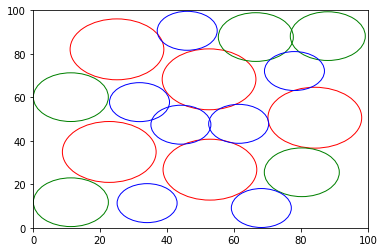

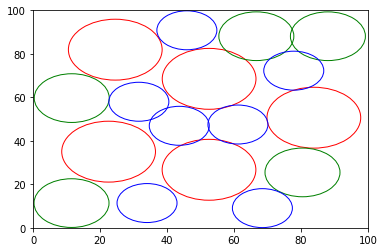

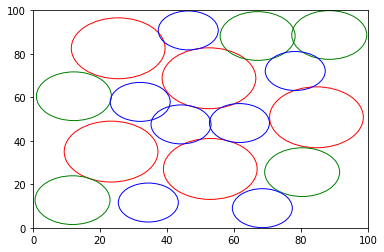

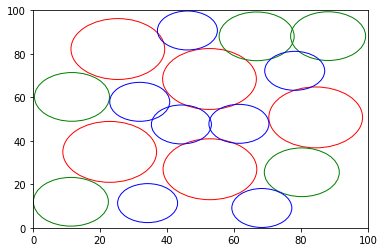

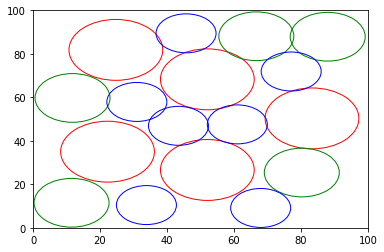

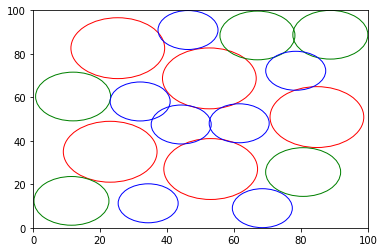

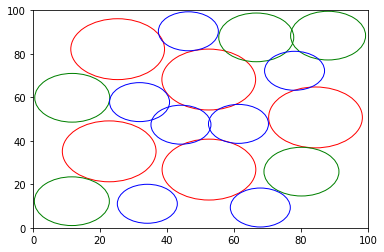

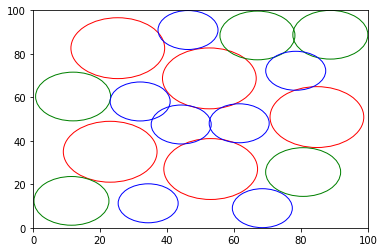

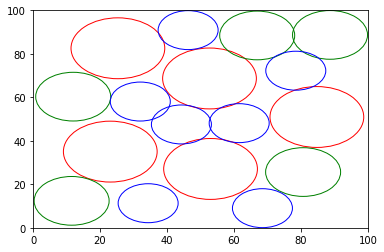

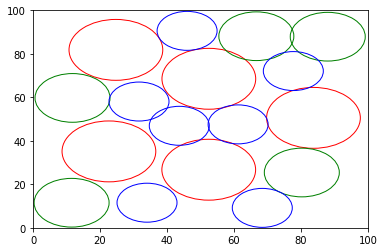

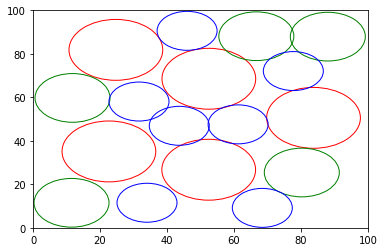

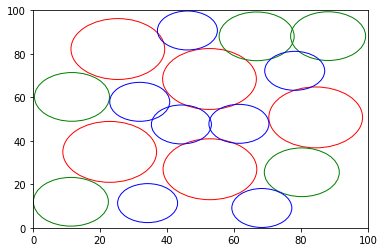

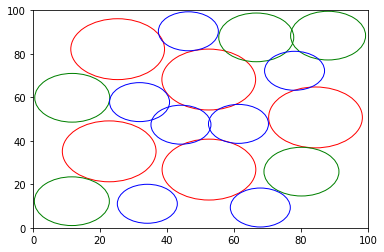

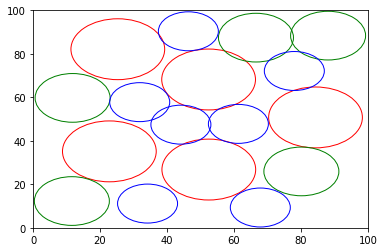

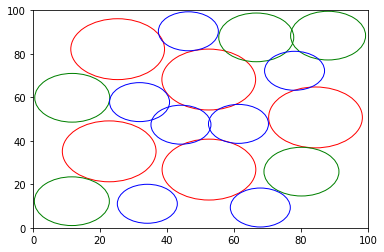

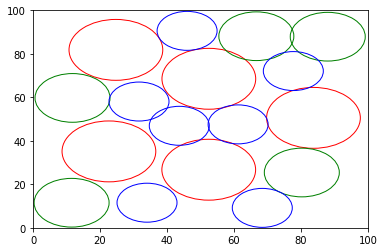

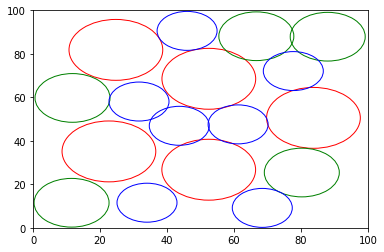

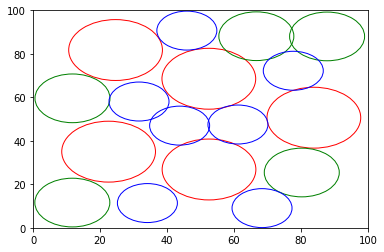

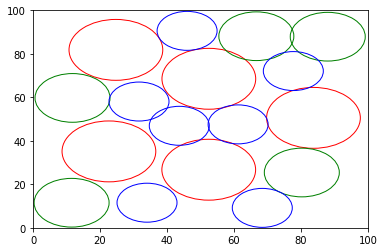

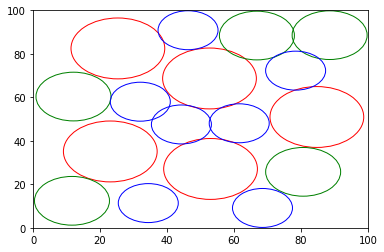

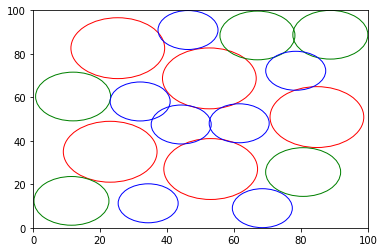

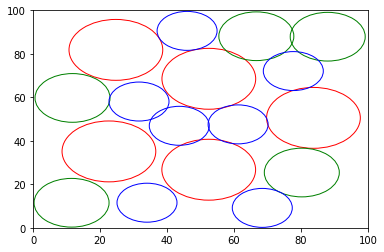

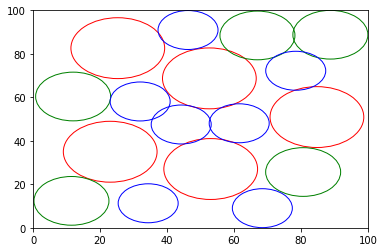

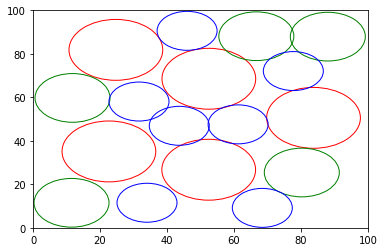

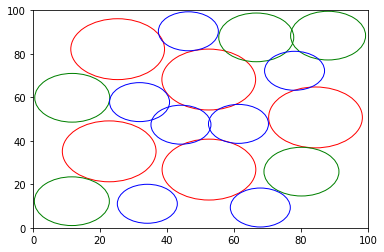

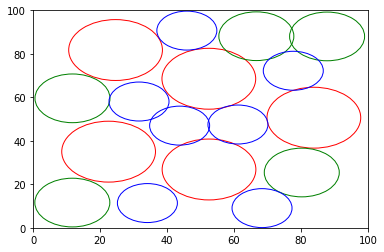

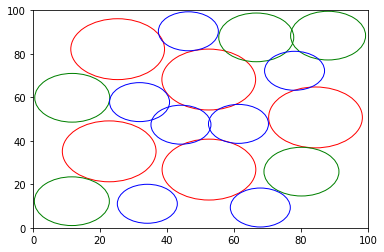

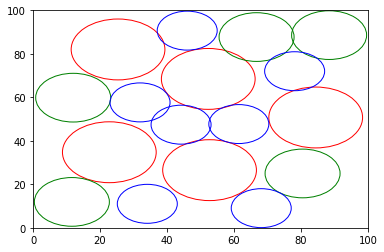

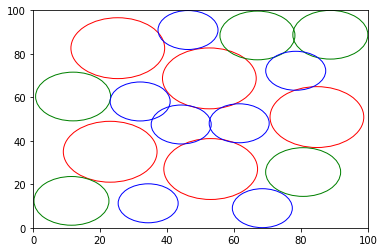

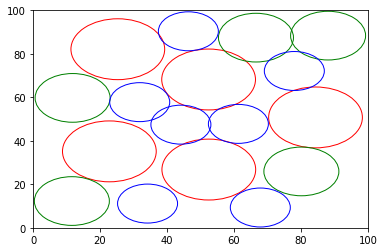

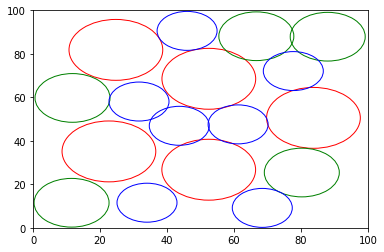

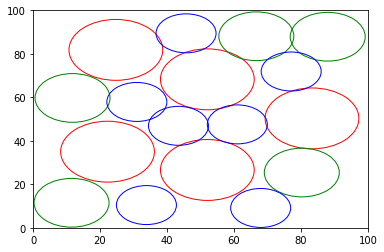

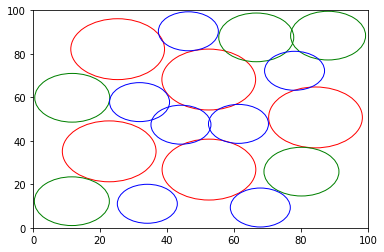

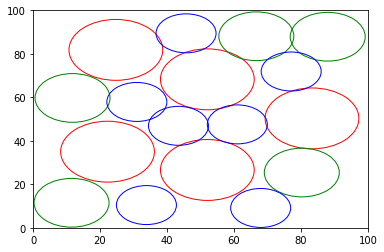

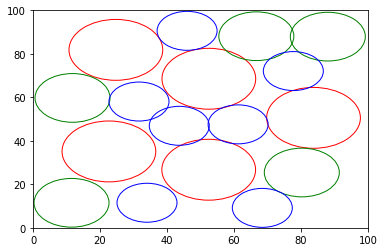

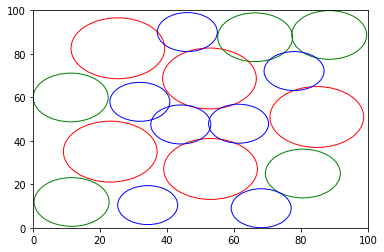

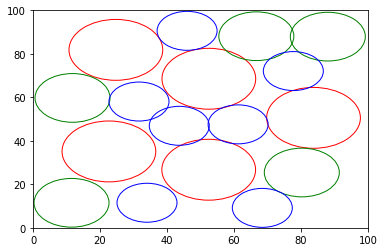

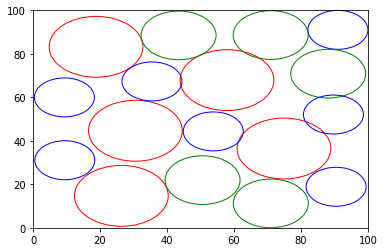

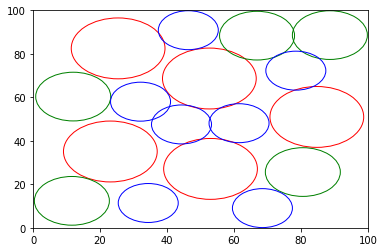

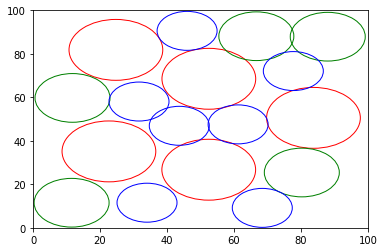

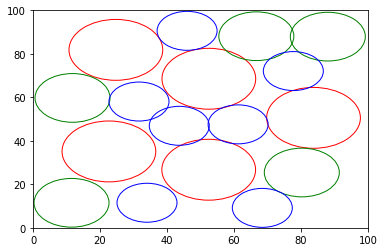

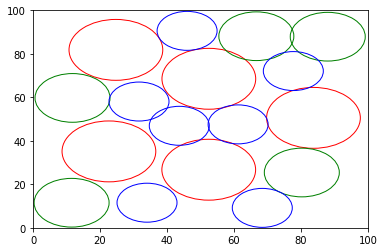

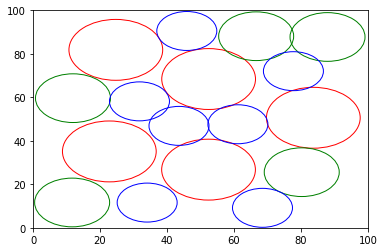

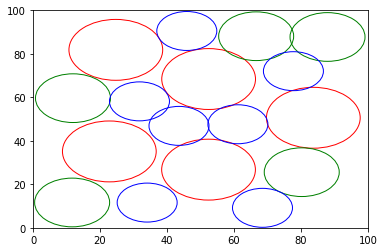

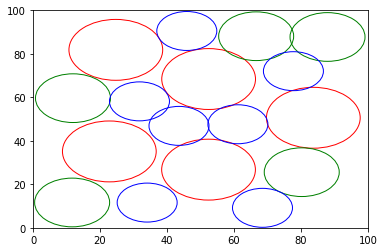

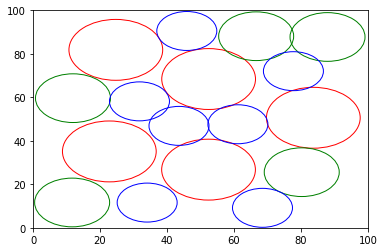

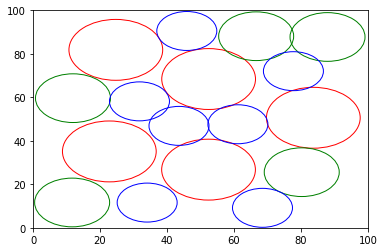

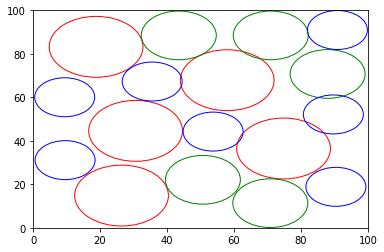

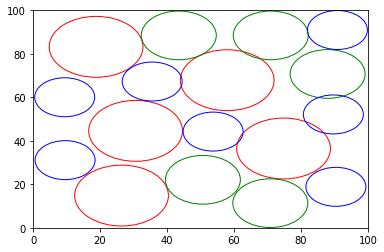

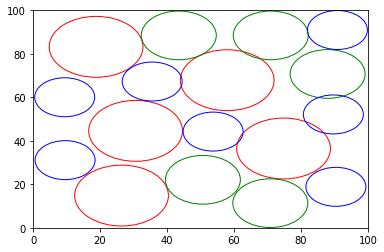

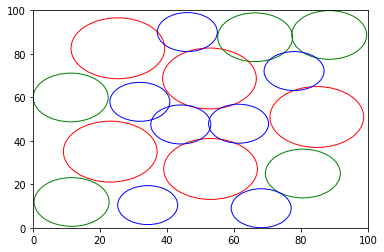

In [12]:
for p in population:
    draw_res(p)     
    
acc_list=update_pop(population)
print(max(acc_list))
for r in population:
    if r.acc==min(acc_list):
        draw_res(r)